By: Daniel Leskewicz, Kenneth Mcdonough 

## Imports

In [60]:
import pandas as pd
import os
import json
import numpy as np
import glob
import csv
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE
import matplotlib.pyplot as plt 
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import preprocessing

## Data Extraction

In [2]:
email_path = '/home/oko/Desktop/ml-production-systems-data/email_json_dataset1'

json_pattern = os.path.join(email_path,'*.json')
file_list = glob.glob(json_pattern)

In [5]:
data = [] # These are going to be dataframes

In [6]:
for file in file_list:
    email_data = pd.read_json(file, lines=True) # read data frame from json file
    data.append(email_data) # append the data frame to the list

temp = pd.concat(data, ignore_index=True)
temp = temp.astype(str)

In [11]:
display(temp)

,label,to_address,from_address,subject,body
0,spam,manager@flax9.uwaterloo.ca,"""Ramirez, Ismael"" <Lay1S@crossstitchcrazy.info>","Please respond to your loan application Sun, ...","\n\nDear Homeowner,\n\nWould you like to reduc..."
1,ham,Spencer Graves <spencer.graves@pdf.com>,Prof Brian Ripley <ripley@stats.ox.ac.uk>,Re: [R] PCA for Binary data,"On Tue, 12 Jun 2007, Spencer Graves wrote:\n\n..."
2,spam,<ktwarwic@speedy.uwaterloo.ca>,"""Miguel Torres"" <radiobarn.com@dpweb.vendaregr...",Software At Low Pr1ce,\n\nHi\n\n\n\n\n\n\nIn 1963 when he met Jack T...
3,ham,"""avcavc"" <ktwarwic@speedy.uwaterloo.ca>","""AccuWeather.com Alert"" <inbox@messaging.accuw...",AccuWeather.com Alert(tm) Advisory (avcavc),\n\nAccuWeather.com Alert[TM]\n\n\n\n\n\n\n\n\...
4,ham,James Peach <jpeach@samba.org>,Volker Lendecke <Volker.Lendecke@SerNet.DE>,Re: setgroups problems on FreeBSD - proposed fix,
...,...,...,...,...,...
63537,spam,cruiseca@speedy.uwaterloo.ca,"""Condom Giveaway"" <return@anythingrading.com>",Condom Sampler Pack Giveaway - Its Always Bett...,\n\n\n\n\n\n\nI Want My \n Condoms!©2003-...
63538,spam,<ktwarwic@flax9.uwaterloo.ca>,"""Sherman Nichols"" <libertineDeimos@secretservi...",re:Medications for US residents,\n\n\n\n\n\n\n\nDear customer.\nUSA Web pharma...
63539,spam,producttestpanel@speedy.uwaterloo.ca,PremierOffer <PremierOffer@accesssender.com>,"adf, Join More Than 3 Million Card Holders",\n\n251839499/ Infobox President// name Glo...
63540,ham,r-help@stat.math.ethz.ch,Megh Dal <megh700004@yahoo.com>,[R] Calculating Percentile in R,"Hi all,\n \nI have a problem on how R calculat..."


Q1: The column names within this panda dataframe are label, to_address, from_address, subject, and body. I have made all of the columns data type into strings. 

## Extract Features

In [7]:
vectorizer = CountVectorizer(min_df=10) #creating a instance of CountVectorizer

In [8]:
bodies = temp['body'].values

In [9]:
X = vectorizer.fit_transform(bodies) 

In [10]:
print("Vectorizer Vocabulary: ", vectorizer.vocabulary_)

Vectorizer Vocabulary:  {'dear': 9551, 'homeowner': 14925, 'would': 31720, 'you': 31975, 'like': 17679, 'to': 29146, 'reduce': 24029, 'your': 31984, 'mortgage': 19441, 'payment': 21593, 'refinance': 24062, 'with': 31574, 'us': 30278, 'for': 12934, 'better': 5833, 'rate': 23740, 'approval': 4687, 'is': 16290, 'waiting': 31020, 'can': 6874, 'receive': 23906, '244': 2005, '000': 1, '689': 2971, 'per': 21734, 'month': 19381, 'save': 25421, '45': 2570, 'please': 22215, 'respond': 24542, 'now': 20376, 'http': 15095, 'ilook': 15384, 'tw': 29714, 'academy': 3632, 'finance': 12632, 'enjoy': 11497, 'when': 31347, 'and': 4446, 'endure': 11447, 'must': 19661, 'johann': 16566, 'wolfgang': 31625, 'von': 30908, 'on': 20799, 'tue': 29650, '12': 1467, 'jun': 16672, '2007': 1842, 'spencer': 27106, 'graves': 14027, 'wrote': 31768, 'the': 28803, 'problem': 22955, 'applying': 4661, 'prcomp': 22664, 'binary': 5913, 'data': 9434, 'that': 28798, 'it': 16331, 'not': 20320, 'clear': 7692, 'what': 31333, 'are': 

In [77]:
print("Feature Matrix: ", X, X.shape)
print("Matrix Nonzero: ", X.count_nonzero())

Feature Matrix:    (0, 9551)	1
  (0, 14925)	1
  (0, 31720)	1
  (0, 31975)	4
  (0, 17679)	1
  (0, 29146)	1
  (0, 24029)	1
  (0, 31984)	2
  (0, 19441)	1
  (0, 21593)	1
  (0, 24062)	1
  (0, 31574)	1
  (0, 30278)	1
  (0, 12934)	2
  (0, 5833)	1
  (0, 23740)	1
  (0, 4687)	1
  (0, 16290)	1
  (0, 31020)	1
  (0, 6874)	2
  (0, 23906)	1
  (0, 2005)	1
  (0, 1)	1
  (0, 2971)	1
  (0, 21734)	1
  :	:
  (63541, 19683)	1
  (63541, 5011)	1
  (63541, 15321)	1
  (63541, 1550)	1
  (63541, 15750)	1
  (63541, 11279)	3
  (63541, 16080)	1
  (63541, 13054)	1
  (63541, 2024)	1
  (63541, 13720)	1
  (63541, 26770)	1
  (63541, 14693)	2
  (63541, 18998)	1
  (63541, 9488)	1
  (63541, 9608)	2
  (63541, 24389)	1
  (63541, 31757)	2
  (63541, 18730)	1
  (63541, 21996)	1
  (63541, 14816)	1
  (63541, 7132)	1
  (63541, 26441)	1
  (63541, 6298)	1
  (63541, 6791)	1
  (63541, 22135)	1 (63542, 32144)
Matrix Nonzero:  6388757


Q2: The feature matrix has 63542 rows and 32144 columns. The amount of nonzero values are 6388757. 

## Create and Evaluate a Simple Classifier

In [46]:
labels = temp['label'] #grabbing our labels

#using label Encoder to encode our data
label_encoder = preprocessing.LabelEncoder()

temp['Encoded_Labels'] = label_encoder.fit_transform(labels)

#use the new encoded labels
encoded_labels = temp['Encoded_Labels'] 
# Spam = 1, Ham = 0

display(temp)

,label,to_address,from_address,subject,body,Encoded_Labels
0,spam,manager@flax9.uwaterloo.ca,"""Ramirez, Ismael"" <Lay1S@crossstitchcrazy.info>","Please respond to your loan application Sun, ...","\n\nDear Homeowner,\n\nWould you like to reduc...",1
1,ham,Spencer Graves <spencer.graves@pdf.com>,Prof Brian Ripley <ripley@stats.ox.ac.uk>,Re: [R] PCA for Binary data,"On Tue, 12 Jun 2007, Spencer Graves wrote:\n\n...",0
2,spam,<ktwarwic@speedy.uwaterloo.ca>,"""Miguel Torres"" <radiobarn.com@dpweb.vendaregr...",Software At Low Pr1ce,\n\nHi\n\n\n\n\n\n\nIn 1963 when he met Jack T...,1
3,ham,"""avcavc"" <ktwarwic@speedy.uwaterloo.ca>","""AccuWeather.com Alert"" <inbox@messaging.accuw...",AccuWeather.com Alert(tm) Advisory (avcavc),\n\nAccuWeather.com Alert[TM]\n\n\n\n\n\n\n\n\...,0
4,ham,James Peach <jpeach@samba.org>,Volker Lendecke <Volker.Lendecke@SerNet.DE>,Re: setgroups problems on FreeBSD - proposed fix,,0
...,...,...,...,...,...,...
63537,spam,cruiseca@speedy.uwaterloo.ca,"""Condom Giveaway"" <return@anythingrading.com>",Condom Sampler Pack Giveaway - Its Always Bett...,\n\n\n\n\n\n\nI Want My \n Condoms!©2003-...,1
63538,spam,<ktwarwic@flax9.uwaterloo.ca>,"""Sherman Nichols"" <libertineDeimos@secretservi...",re:Medications for US residents,\n\n\n\n\n\n\n\nDear customer.\nUSA Web pharma...,1
63539,spam,producttestpanel@speedy.uwaterloo.ca,PremierOffer <PremierOffer@accesssender.com>,"adf, Join More Than 3 Million Card Holders",\n\n251839499/ Infobox President// name Glo...,1
63540,ham,r-help@stat.math.ethz.ch,Megh Dal <megh700004@yahoo.com>,[R] Calculating Percentile in R,"Hi all,\n \nI have a problem on how R calculat...",0


In [47]:
X_train, x_test, y_train, y_test = train_test_split(X, encoded_labels)

In [50]:
clf = MLPClassifier() #creating an instance of an MLP classifier

clf.fit(X_train, y_train) #fitting our MLP model

MLPClassifier()

In [51]:
y_pred = clf.predict(x_test)
y_pred_proba = clf.predict_proba(x_test)

Accuracy Score:  0.968840488480423
Recall Score:  0.923036831132731
Percision Score:  0.9903075489282386


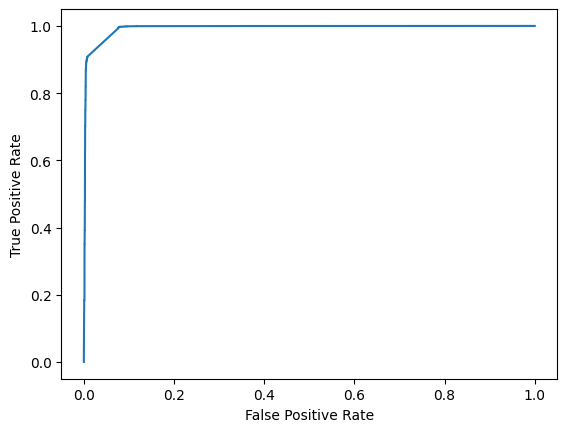

In [63]:
## Report
print("Accuracy Score: " , accuracy_score(y_true=y_test, y_pred=y_pred))
print("Recall Score: ", recall_score(y_true=y_test, y_pred=y_pred, pos_label=0))
print("Percision Score: ", precision_score(y_true=y_test, y_pred=y_pred, pos_label=0))

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba[:,1])
plt.plot(fpr,tpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()


### Exploring Class Imbalance

dict_keys(['spam', 'ham'])
dict_values([40450, 23092])


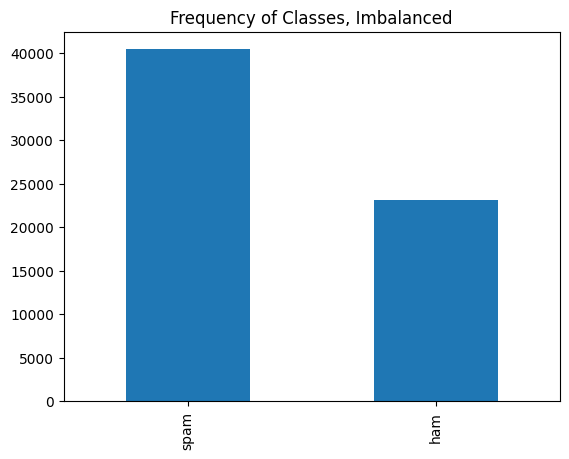

In [64]:
#Looking at the class imbalance between ham and spam
print(Counter(labels).keys())
print(Counter(labels).values())

ax = temp.label.value_counts().plot(kind='bar')
_ = ax.set_title('Frequency of Classes, Imbalanced')

As we can see with the figure above there is a significant number of spam compared to ham. We can perform techniques such as over sampling or undersampling to fix this issue. 

### Random Over-Sampling Dataset

In [67]:
ros = RandomOverSampler(random_state=42)

#creating new training set
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

print(sorted(Counter(y_train_ros).items()))
#From this we can see that most classes have 30320 items in them. 

[(0, 30320), (1, 30320)]


In [71]:
# Creating and Training our MLP again
clf_ros = MLPClassifier() #creating an instance of an MLP classifier

clf_ros.fit(X_train_ros, y_train_ros) #fitting our MLP model

y_pred_ros = clf_ros.predict(x_test)
y_pred_proba_ros = clf_ros.predict_proba(x_test)

Accuracy Score:  0.9689034369885434
Recall Score:  0.9223419041000694
Percision Score:  0.9912247946228528


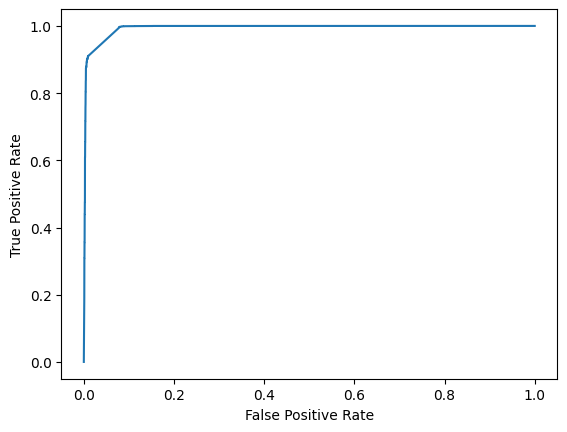

In [72]:
## Report
print("Accuracy Score: " , accuracy_score(y_true=y_test, y_pred=y_pred_ros))
print("Recall Score: ", recall_score(y_true=y_test, y_pred=y_pred_ros, pos_label=0))
print("Percision Score: ", precision_score(y_true=y_test, y_pred=y_pred_ros, pos_label=0))

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_ros[:,1])
plt.plot(fpr,tpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

### Random Under-Sampling Dataset

In [73]:
rus = RandomUnderSampler(random_state=42)

X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print(sorted(Counter(y_train_rus).items()))
#From this we can see that most classes have 17336 items each of them. 

[(0, 17336), (1, 17336)]


In [74]:
# Creating and Training our MLP again
clf_rus = MLPClassifier() #creating an instance of an MLP classifier

clf_rus.fit(X_train_rus, y_train_rus) #fitting our MLP model

y_pred_rus = clf_rus.predict(x_test)
y_pred_proba_rus = clf_rus.predict_proba(x_test)

Accuracy Score:  0.9663225481556087
Recall Score:  0.9265114662960389
Percision Score:  0.9794306703397613


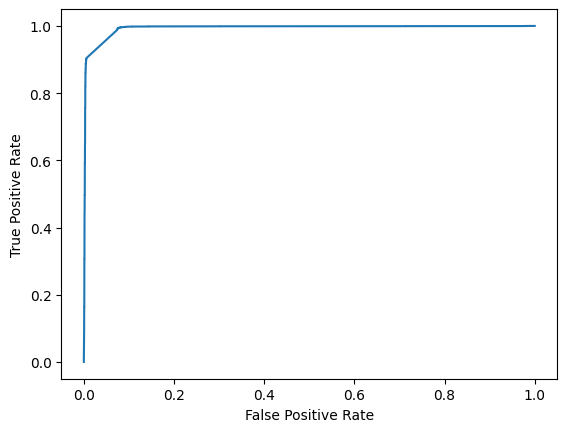

In [75]:
## Report
print("Accuracy Score: " , accuracy_score(y_true=y_test, y_pred=y_pred_rus))
print("Recall Score: ", recall_score(y_true=y_test, y_pred=y_pred_rus, pos_label=0))
print("Percision Score: ", precision_score(y_true=y_test, y_pred=y_pred_rus, pos_label=0))

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_rus[:,1])
plt.plot(fpr,tpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()